# Bike Sharing Analysis with Ford GoBike Data
## by Amira Tantawy

## introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [42]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [5]:
folder_name = 'trip_data_files'

In [4]:
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name)

In [6]:
list_csvs = []
for file_name in listdir(folder_name):
    list_csvs.append(pd.read_csv(folder_name+'/'+file_name))
df = pd.concat(list_csvs)

In [7]:
df.to_csv('data.csv')

In [43]:
df = pd.read_csv('data.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(3), object(7)
memory usage: 309.3+ MB


In [45]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer


In [46]:
# Check if duplicates exist
df.duplicated().sum()

0

In [47]:
# Drop unwanted columns.
df = df.drop(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 9 columns):
Unnamed: 0           int64
Unnamed: 0.1         float64
bike_id              int64
duration_sec         int64
end_time             object
member_birth_year    float64
member_gender        object
start_time           object
user_type            object
dtypes: float64(2), int64(3), object(4)
memory usage: 154.6+ MB


In [48]:
sns.set_style('darkgrid')
sns.set_context("paper")

In [49]:
df['member_age'] = 2018-df['member_birth_year']

In [50]:
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    2.079810e+06
mean     3.553289e+01
std      1.051074e+01
min      1.800000e+01
10%      2.400000e+01
20%      2.700000e+01
30%      2.900000e+01
40%      3.100000e+01
50%      3.300000e+01
60%      3.600000e+01
70%      3.900000e+01
75%      4.100000e+01
80%      4.400000e+01
90%      5.100000e+01
95%      5.600000e+01
max      1.370000e+02
Name: member_age, dtype: float64

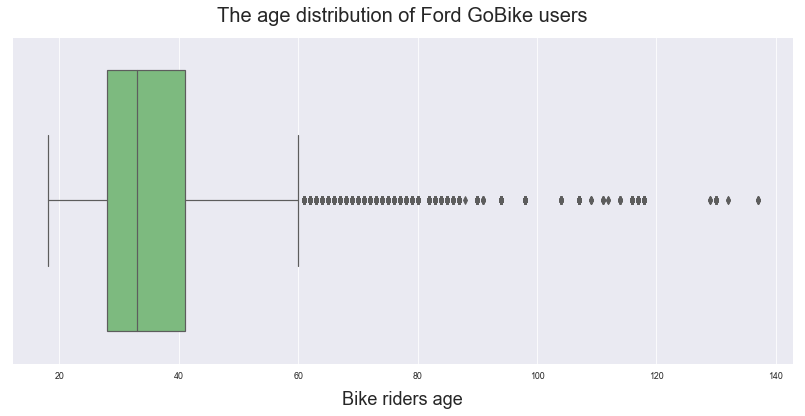

In [51]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, palette='Greens', orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Bike riders age", fontsize=18, labelpad=10)
plt.savefig('img01.png');

Here we can see that about 95% of the users in age under 60 years old, so it'll be useful to remove other ages.

In [52]:
df = df[df['member_age']<=60]

In [53]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [54]:
print(df.shape)
print(df.dtypes)
print(df.head(2))

(2032159, 8)
bike_id                int64
duration_sec           int64
end_time              object
member_birth_year    float64
member_gender         object
start_time            object
user_type             object
member_age           float64
dtype: object
   bike_id  duration_sec                  end_time  member_birth_year  \
0       96         80110  2018-01-01 15:12:50.2450             1987.0   
1       88         78800  2018-01-01 13:49:55.6170             1965.0   

  member_gender                start_time user_type  member_age  
0          Male  2017-12-31 16:57:39.6540  Customer        31.0  
1        Female  2017-12-31 15:56:34.8420  Customer        53.0  


### What is the structure of your dataset?

> it contains 18 columns and 2252057 rows.
### What is/are the main feature(s) of interest in your dataset?

> it contains start and end points also the gender through the period from 2017-2018

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the gender column and member birth year.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [55]:
# set dates to timestamps
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [56]:
# Generate 'date' columns.
df['start_time_date'] = df['start_time'].dt.date
df['end_time_date'] = df['end_time'].dt.date

# Generate 'year_month' columns.
df['start_time_year_month'] = df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month'] = df['end_time'].map(lambda x: x.strftime('%Y-%m'))

# Generate 'year' and 'month' columns then change the data type to int.
df['start_time_year'] = df['start_time'].dt.year.astype(int)
df['end_time_year'] = df['end_time'].dt.year.astype(int)
df['start_time_month'] = df['start_time'].dt.month.astype(int)
df['end_time_month'] = df['end_time'].dt.month.astype(int)

df.head()

,bike_id,duration_sec,end_time,member_birth_year,member_gender,start_time,user_type,member_age,start_time_date,end_time_date,start_time_year_month,end_time_year_month,start_time_year,end_time_year,start_time_month,end_time_month
0,96,80110,2018-01-01 15:12:50.245,1987.0,Male,2017-12-31 16:57:39.654,Customer,31.0,2017-12-31,2018-01-01,2017-12,2018-01,2017,2018,12,1
1,88,78800,2018-01-01 13:49:55.617,1965.0,Female,2017-12-31 15:56:34.842,Customer,53.0,2017-12-31,2018-01-01,2017-12,2018-01,2017,2018,12,1
4,3167,43603,2018-01-01 02:29:57.571,1997.0,Female,2017-12-31 14:23:14.001,Subscriber,21.0,2017-12-31,2018-01-01,2017-12,2018-01,2017,2018,12,1
6,3539,4507,2018-01-01 01:04:35.619,1991.0,Female,2017-12-31 23:49:28.422,Customer,27.0,2017-12-31,2018-01-01,2017-12,2018-01,2017,2018,12,1
12,2311,2183,2018-01-01 00:29:18.743,1990.0,Male,2017-12-31 23:52:55.581,Subscriber,28.0,2017-12-31,2018-01-01,2017-12,2018-01,2017,2018,12,1


In [57]:
# Generate 'hour_minute' and 'hour' columns.
df['start_time_hour_minute'] = df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute'] = df['end_time'].map(lambda x: x.strftime('%H-%m'))
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [58]:
# Generate 'weekday' and 'weekday_abbr' columns.
df['start_time_weekday'] = df['start_time'].dt.weekday_name
df['end_time_weekday'] = df['end_time'].dt.weekday_name
df['start_time_weekday_abbr'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr'] = df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [59]:
# Generate a 'renamed' column for a better view on the chart.
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [60]:
# Generate a 'member_age_bin' column based on the different age range.
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [61]:
# Generate duration_min from duration_sec for a better readable purpose.
df['duration_min'] = df['duration_sec']/60

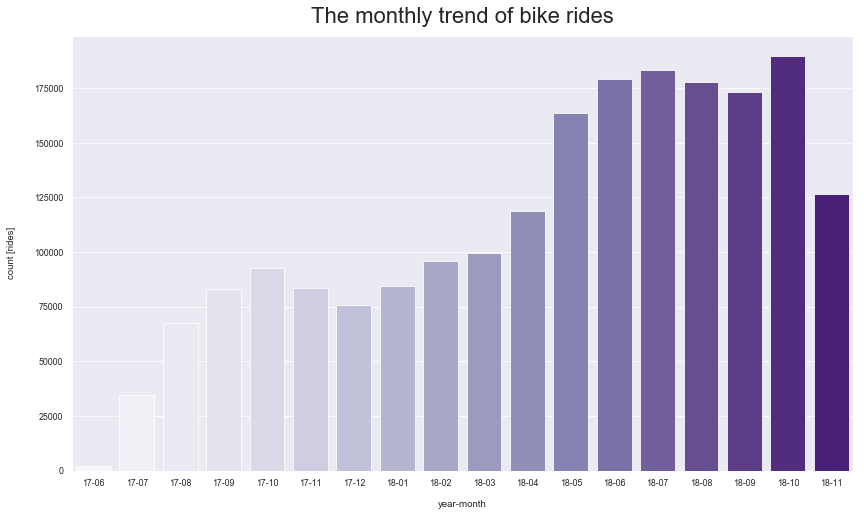

In [62]:
# monthly usege of the bike sharing system
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month_renamed', palette="Purples", data=df.sort_values(by='start_time_year_month_renamed'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=12)
plt.ylabel('count [rides]', labelpad=18)
ax = plt.gca()
plt.savefig('img02.png')

#### we can see that bike sharing reaches it's peak in october then july.
#### also it's trending in summer months more than winter maybe because the good weather.
#### we can also notice that GoBike is getting more popular in 2018 than 2017.

 ### Bike rides per gender

In [63]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [64]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

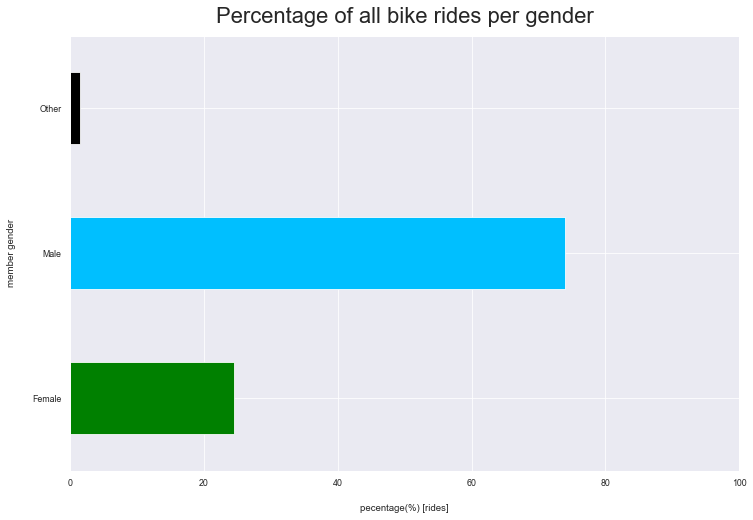

In [65]:
new_color = ['green', 'deepskyblue', 'black']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,8))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('img03.png');

### Bike rides per weekdays

In [66]:
df.head(1)

,bike_id,duration_sec,end_time,member_birth_year,member_gender,start_time,user_type,member_age,start_time_date,end_time_date,...,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,start_time_year_month_renamed,member_age_bins,duration_min
0,96,80110,2018-01-01 15:12:50.245,1987.0,Male,2017-12-31 16:57:39.654,Customer,31.0,2017-12-31,2018-01-01,...,15-01,16,15,Sunday,Monday,Sun,Mon,17-12,30 - 40,1335.166667


In [67]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})

In [68]:
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

In [69]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

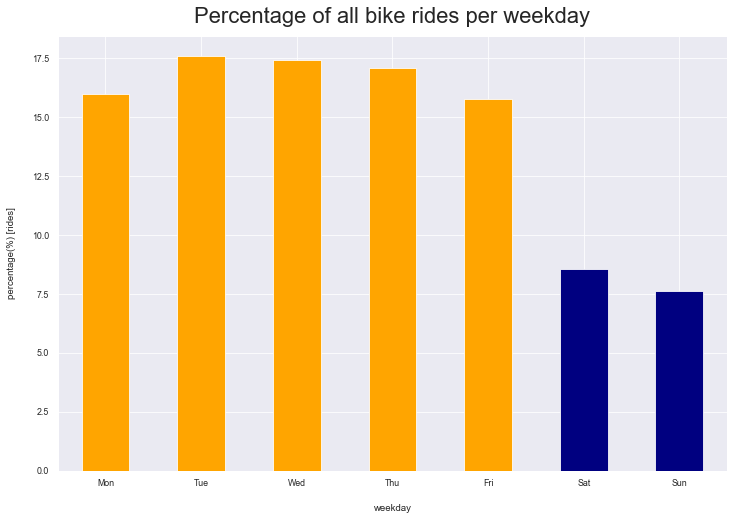

In [70]:
new_color = ['orange', 'orange', 'orange', 'orange', 'orange', 'navy', 'navy']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('img04.png');

### we can see that this activity is more trending on weekdays than weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There wasn't unusual points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.

## Bivariate Exploration

>Here I'll add customer type to the analysis.

###  Are there any difference between subscribers' and customers' behaviors?

### Percentage of bike rides of subscribers vs customers

In [71]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')

In [72]:
count_of_rides_per_user_type['count']/len(df)*100

0    11.529511
1    88.470489
Name: count, dtype: float64

Percentage of subscribers is almost %88.15.  
Percentage of customers is almost %11.85.


##  User trends of bike rides of subscribers vs customers

In [73]:
user_type_count_per_year_df = df.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

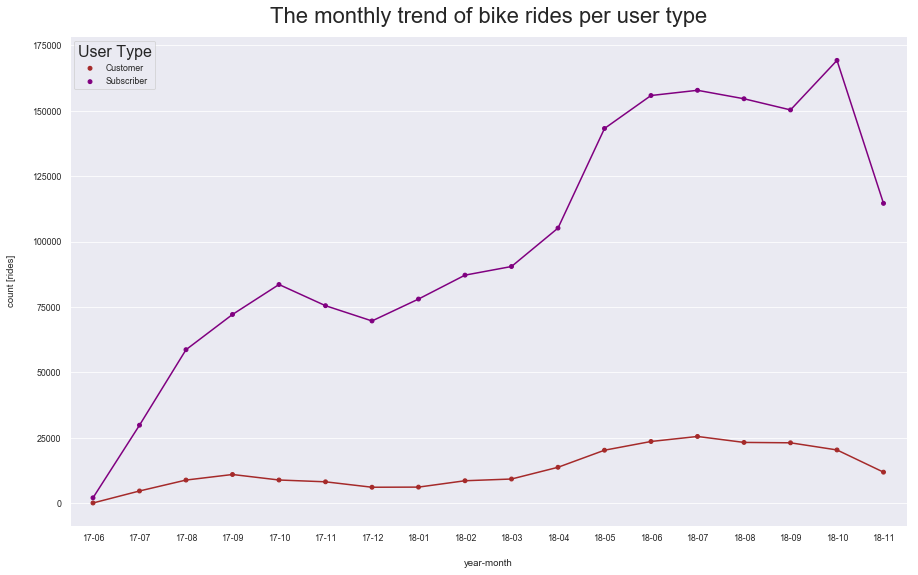

In [74]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'purple', 'Customer':'brown'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
plt.savefig('img05.png');

### Average trip duration of subscribers vs customers

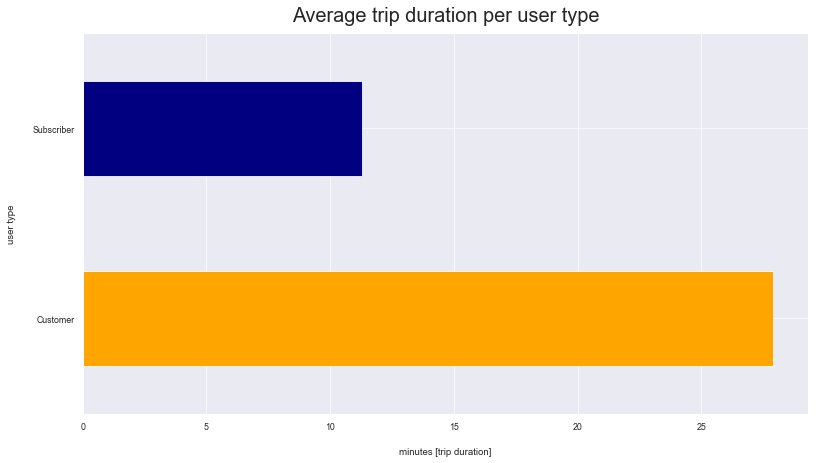

In [83]:
new_color=['orange', 'navy']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)
plt.savefig('img06.png');

### we can see that customers average trip duration is around 28 minutes and more than subscripers average trip duration which is around 11 minutes.

In [75]:
# calculating % split for the user type
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df['bike_id'].count()
subscriber_proportion = subscriber / df['bike_id'].count()

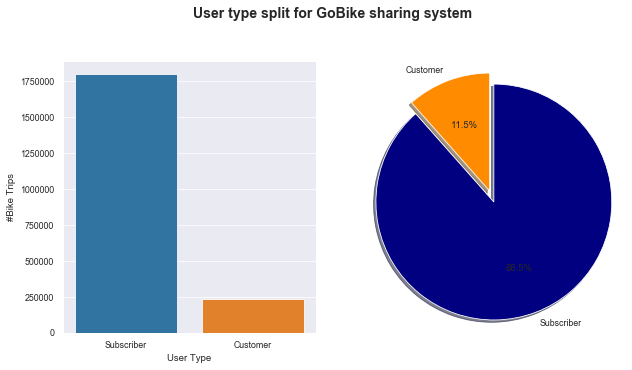

In [76]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df, x="user_type", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'navy']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

plt.savefig('img07.png');

Subscribers are way more than occasional users in this activity.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

when we added the user type to our analysis we can detect different behaviours. as we can see customers number is less than subscribers who is daily coommuters.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1- Customers trips are usually longer than for subscribers.
2- customers prefer bike rides around weekends in summertime.
3- subscripers are more than customers who are participate in this activity.
4- this activity is more trending on weekdays than weekends.

## Multivariate Exploration

> Now I'm adding gender to customer type for analysis.

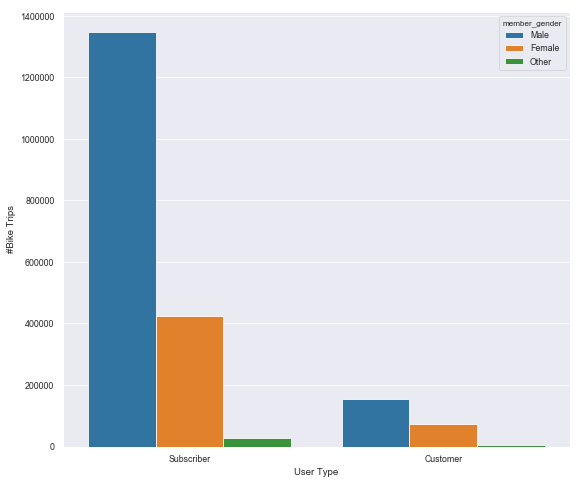

In [41]:
plt.figure(figsize = [20, 8])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');
plt.savefig('img08.png');

we can see that men are participating in this activity more than women.

## Effects of age group,weekdays and hours on bike rides.

In [77]:
# Creating new variables for different age groups of subscribers.
subscriber_1 = df[(df['member_age'] >= 20) & (df['member_age'] < 30) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_2 = df[(df['member_age'] >= 30) & (df['member_age'] < 40) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_3 = df[(df['member_age'] >= 40) & (df['member_age'] < 50) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_4 = df[(df['member_age'] >= 50) & (df['member_age'] <= 60) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [78]:
# creating weekday categories
subscriber_1['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_1['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_2['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_2['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_3['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_3['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_4['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_4['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

In [79]:
# Create a column for calculating the count percentage.
subscriber_1['count_perc'] = subscriber_df_1['count'].apply(lambda x: (x/subscriber_df_1['count'].sum())*100)
subscriber_2['count_perc'] = subscriber_df_2['count'].apply(lambda x: (x/subscriber_df_2['count'].sum())*100)
subscriber_3['count_perc'] = subscriber_df_3['count'].apply(lambda x: (x/subscriber_df_3['count'].sum())*100)
subscriber_4['count_perc'] = subscriber_df_4['count'].apply(lambda x: (x/subscriber_df_4['count'].sum())*100)
subscriber_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
start_time_weekday_abbr    126 non-null category
start_time_hour            126 non-null int64
count                      126 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.5 KB


In [80]:
# Create a rank column for the count_perc and make the data type as int.
subscriber_1['rank'] = subscriber_1['count_perc'].rank(ascending=False).astype(int)
subscriber_2['rank'] = subscriber_2['count_perc'].rank(ascending=False).astype(int)
subscriber_3['rank'] = subscriber_3['count_perc'].rank(ascending=False).astype(int)
subscriber_4['rank'] = subscriber_4['count_perc'].rank(ascending=False).astype(int)

In [81]:
# Create a pivot table for the heatmap based on start_time_hour, weekday, and rank.
subscriber_1_pivot = subscriber_1.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_2_pivot = subscriber_2.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_3_pivot = subscriber_3.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_4_pivot = subscriber_4.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

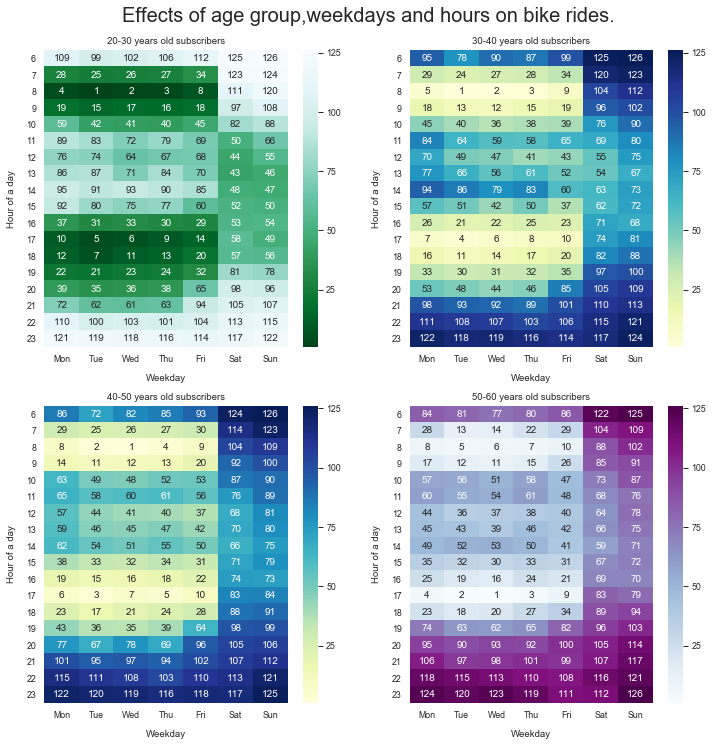

In [82]:
# Create for heatmaps for four different age groups based on rank, weekday, and hour of a day. Higher the rank, brighter the color, means users rode more often in the time zone.
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.suptitle('Effects of age group,weekdays and hours on bike rides.', fontsize=20, y=0.93)
sns.heatmap(subscriber_1_pivot, fmt='d', annot=True, cmap='BuGn_r', annot_kws={'size': 10})
plt.title('20-30 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360)

plt.subplot(222)
sns.heatmap(subscriber_2_pivot, fmt='d', annot=True, cmap='YlGnBu', annot_kws={'size': 10})
plt.title('30-40 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360)

plt.subplot(223)
sns.heatmap(subscriber_3_pivot, fmt='d', annot=True, cmap='YlGnBu', annot_kws={'size': 10})
plt.title('40-50 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360)

plt.subplot(224)
sns.heatmap(subscriber_4_pivot, fmt='d', annot=True, cmap='BuPu', annot_kws={'size': 10})
plt.title('50-60 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360);
plt.savefig('img09.png');

## conclusion

20-30 years old users are rapidly growing compared to other user groups. 
Male took around %76 of all bike rides, and female took around %24 of them.
People use this service on weekdays more than weekends.
8am and 5pm are the peak hours for this service. Also, people use this service when they are in lunch time as well.
Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85.
Customers' rides seems increasing slightly but subscibers' rides reached 6 times more than customers' on October 2018. 
There is a decrease on November 2018 for subscribers but it seems like it is related with winter season.
Subscribers' average trip duration is around 11 minutes. Customers' average trip duration is around 28 minutes.
Subscribers and customers trip distance were about the same, which is slightly more than one mile.
90% of bike rides take place on weekday.
The peak bike rides time for all members is around commute time.

Finally, it seems that 40 to 50 years old age group use the service the most.
After Ford GoBike did a pilot launch of e-bike on April 24th 2018, there have been quite a lot of electric bike rides as well, which reached to 10% of daily rides at the end of July 2018. However, daily electric bike rides is on downward trend.